In [1]:
pip install shap catboost

Note: you may need to restart the kernel to use updated packages.


In [258]:
import pandas as pd
import numpy as np
import modules

from scipy.stats import beta
from modules import ml_functions

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

New version file.py

# 1.0 Data retrieval

In [3]:
df = pd.read_pickle('../../data_lake/output/2_dp.pkl')

In [4]:
df.sample(1)

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
SegFile,,,,,,,,,,,,,,,,,,,,,,,
CTG1019.txt,139.0,139.0,1.0,0.0,2.0,35.0,1.0,0.0,11.6,0.0,0.0,0.0,28.0,131.0,159.0,0.0,0.0,144.0,143.0,145.0,1.0,0.0,1.0


# 2.0 Data preparation

In [5]:
df_ml = df.copy()

# 3.0 Modeling
## 3.1 Classe 1

In [6]:
class_nsp = 1.0

In [7]:
df_model, df_ml = ml_functions.model_preparation(df_ml,class_nsp)

In [8]:
X_train, X_test, y_train, y_test, numerical_cols, categorical_cols, parameters = ml_functions.data_splitting(df_model)

(942, 22)
AUC Score:  0.5650785098522167
Adversarial validation check: NO CONCEPT DRIFT: Train and Test set are statistical similar


In [9]:
model = ml_functions.model_training(X_train, y_train, numerical_cols, categorical_cols, parameters)

GridSearchCV results...
Mean Train Scores: 
[0.98074412 0.98107635 0.98539198 0.98838036]

Mean CV Scores: 
[0.94557174 0.94822075 0.95086093 0.94821192]

Best Parameters: 
{'model__depth': 4, 'model__iterations': 500}



Test results...
Model Test Accuracy: 0.8994708994708994
--------------------------------------------------
Model Test Confusion Matrix
First ten features by importances:
['AC', 'ASTV', 'Mode', 'MSTV', 'Mean', 'DP', 'ALTV', 'Median', 'Variance', 'UC']


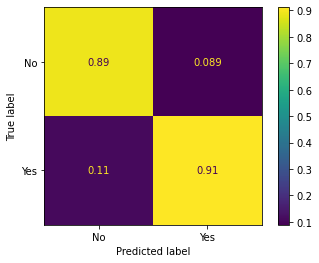

In [10]:
model = ml_functions.model_evaluation(model,X_test,y_test)

In [11]:
df = ml_functions.model_serving(df,model,class_nsp,X_test)

<AxesSubplot:>

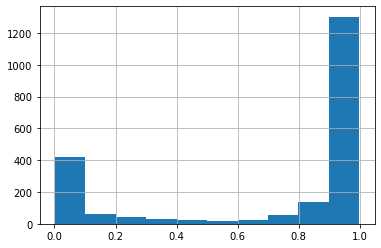

In [12]:
df['proba_classe_1.0'].hist()

## 3.2 Classe 2

In [13]:
class_nsp = 2.0

In [14]:
df_model, df_ml = ml_functions.model_preparation(df_ml,class_nsp)

In [15]:
X_train, X_test, y_train, y_test, numerical_cols, categorical_cols, parameters = ml_functions.data_splitting(df_model)

(590, 22)
AUC Score:  0.4858556056924679
Adversarial validation check: NO CONCEPT DRIFT: Train and Test set are statistical similar


In [16]:
model = ml_functions.model_training(X_train, y_train, numerical_cols, categorical_cols, parameters)

GridSearchCV results...
Mean Train Scores: 
[0.92917147 0.92977936 0.95096402 0.95822759]

Mean CV Scores: 
[0.89823685 0.90308551 0.9078754  0.90302674]

Best Parameters: 
{'model__depth': 3, 'model__iterations': 100}



Test results...
Model Test Accuracy: 0.864406779661017
--------------------------------------------------
Model Test Confusion Matrix
First ten features by importances:
['MSTV', 'AC', 'ALTV', 'ASTV', 'Mean', 'DP', 'LB', 'Mode', 'LBE', 'UC']


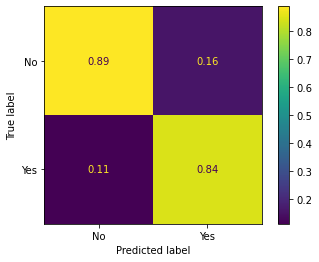

In [17]:
model = ml_functions.model_evaluation(model,X_test,y_test)

In [18]:
df = ml_functions.model_serving(df,model,class_nsp,X_test)

<AxesSubplot:>

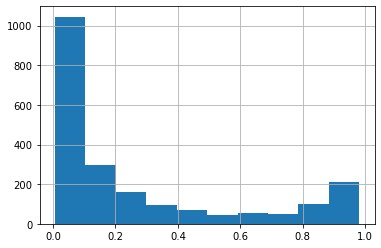

In [19]:
df['proba_classe_2.0'].hist()

## 3.3 Classe 3

In [20]:
class_nsp = 3.0

In [21]:
df_model, df_ml = ml_functions.model_preparation(df_ml,class_nsp)

In [22]:
X_train, X_test, y_train, y_test, numerical_cols, categorical_cols, parameters = ml_functions.data_splitting(df_model)

(352, 22)
AUC Score:  0.516748366013072
Adversarial validation check: NO CONCEPT DRIFT: Train and Test set are statistical similar


In [23]:
model = ml_functions.model_training(X_train, y_train, numerical_cols, categorical_cols, parameters)

GridSearchCV results...
Mean Train Scores: 
[0.98882213 0.98983736 0.99593909 0.99898477]

Mean CV Scores: 
[0.95126531 0.94318367 0.95534694 0.94718367]

Best Parameters: 
{'model__depth': 3, 'model__iterations': 100}



Test results...
Model Test Accuracy: 0.9622641509433962
--------------------------------------------------
Model Test Confusion Matrix
First ten features by importances:
['ALTV', 'Mean', 'ASTV', 'DP', 'Mode', 'Variance', 'Median', 'AC', 'MSTV', 'Width']


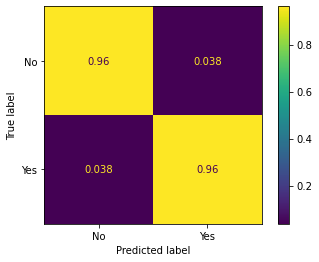

In [24]:
model = ml_functions.model_evaluation(model,X_test,y_test)

In [25]:
df = ml_functions.model_serving(df,model,class_nsp,X_test)

<AxesSubplot:>

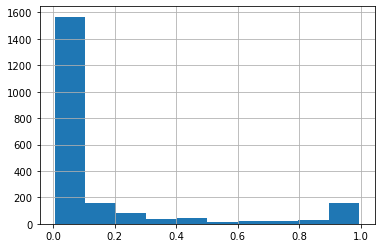

In [26]:
df['proba_classe_3.0'].hist()

# 4.0 Normalizing results & Beta correction

In [27]:
cols = ['proba_classe_1.0','proba_classe_2.0', 'proba_classe_3.0']

In [28]:
df[cols] = df[cols].apply(lambda x: x / x.sum(),axis=1)

In [29]:
df.sample(4)

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP,proba_classe_1.0,proba_classe_2.0,proba_classe_3.0
SegFile,,,,,,,,,,,,,,,,,,,,,,,,,,
CTG1486.txt,132.0,132.0,0.0,0.0,3.0,51.0,0.6,2.0,9.6,0.0,0.0,0.0,25.0,116.0,141.0,1.0,0.0,136.0,135.0,137.0,1.0,1.0,1.0,0.785936,0.193586,0.020477
CTG0061.txt,146.0,146.0,4.0,0.0,4.0,39.0,0.9,18.0,5.2,0.0,0.0,0.0,44.0,134.0,178.0,5.0,0.0,154.0,154.0,155.0,4.0,0.0,1.0,0.830306,0.161366,0.008328
CTG1199.txt,133.0,133.0,0.0,0.0,2.0,53.0,0.7,2.0,9.8,0.0,0.0,0.0,34.0,113.0,147.0,4.0,1.0,136.0,136.0,138.0,1.0,1.0,1.0,0.822900,0.151237,0.025863
CTG1194.txt,133.0,133.0,5.0,0.0,7.0,41.0,1.1,9.0,13.0,0.0,0.0,0.0,82.0,86.0,168.0,4.0,1.0,139.0,143.0,144.0,9.0,1.0,1.0,0.932408,0.060454,0.007137


Beta correction

In [280]:
num_classe = dict()

In [281]:
tot = 0

In [286]:
xax = np.linspace(0,1.0,100)

In [284]:
for i in df['NSP'].unique():
    num = df[df['NSP']==i].shape[0]
    tot = tot + num
    num_classe[i] = dict()
    num_classe[i]['num'] = num

In [285]:
for i in num_classe:
    num_classe[i]['wei'] = num_classe[i]['num'] / tot
    num_classe[i]['k'] = num_classe[i]['num'] * num_classe[i]['wei']

In [335]:
df.head(1)

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP,proba_classe_1.0,proba_classe_2.0,proba_classe_3.0,proba_classe_1.0_beta,proba_classe_2.0_beta,proba_classe_3.0_beta
SegFile,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CTG0001.txt,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0,0.016222,0.531343,0.452435,"[0.0, 14.739226186477968, 65.034328759077, 0.6...","[0.0, 1.0682431063650892e-29, 1.49570882677071...","[0.0, 7.203024483349716e-08, 3.458254302961875..."


In [298]:
df['proba_classe_1.0_beta'] = df['proba_classe_1.0'].apply(lambda x: beta.pdf(xax,(x * (num_classe['1.0']['k']-2)+1),((1-x) * (num_classe['1.0']['k']-2)+1)))
df['proba_classe_2.0_beta'] = df['proba_classe_2.0'].apply(lambda x: beta.pdf(xax,(x * (num_classe['2.0']['k']-2)+1),((1-x) * (num_classe['2.0']['k']-2)+1)))
df['proba_classe_3.0_beta'] = df['proba_classe_3.0'].apply(lambda x: beta.pdf(xax,(x * (num_classe['3.0']['k']-2)+1),((1-x) * (num_classe['3.0']['k']-2)+1)))

In [341]:
import random

In [368]:
index = random.randint(0,2126)

In [369]:
index

1655

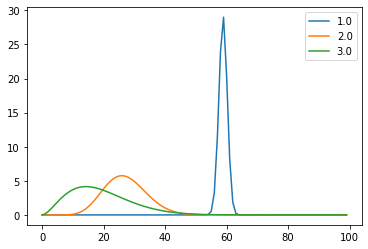

In [370]:
plt.plot(df['proba_classe_1.0_beta'][index],label='1.0')
plt.plot(df['proba_classe_2.0_beta'][index],label='2.0')
plt.plot(df['proba_classe_3.0_beta'][index],label='3.0')
plt.legend()

In [275]:
import matplotlib.pyplot as plt

In [ ]:
def probabilistic_view(df):
    """
    
    """
    num_classe = dict()
    tot = 0
    for i in df['NSP'].unique():
        num = df[df['NSP']==i].shape[0]
        tot = tot + num
        num_classe[i] = dict()
        num_classe[i]['num'] = num
    for i in num_classe:
        num_classe[i]['wei'] = num_classe[i]['num'] / tot
    

# 5.0 Output

In [ ]:
df.ti_pickle('../../data_lake/output/3_mod.pkl')